##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 사용자 정의 학습: 자세히 둘러보기

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서보기</a></td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/customization/custom_training_walkthrough.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a> </td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/customization/custom_training_walkthrough.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소그 보기</a></td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/customization/custom_training_walkthrough.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a>   </td>
</table>

이 튜토리얼은 펭귄을 종별로 *분류*하기 위한 사용자 정의 훈련 루프를 사용하여 머신러닝 모델을 학습시키는 방법을 보여줍니다. 이 노트북에서는 TensorFlow를 사용하여 다음을 수행합니다.

1. 데이터세트 가져오기
2. 간단한 선형 모델 구축하기
3. 모델 훈련하기
4. 모델의 효과 평가하기
5. 훈련된 모델을 사용하여 예측하기

##  TensorFlow 프로그래밍

이 튜토리얼은 다음 TensorFlow 프로그래밍 작업을 보여 줍니다.

- [TensorFlow 데이터세트 API](https://www.tensorflow.org/datasets/overview#load_a_dataset)를 활용한 데이터 가져오기
- [Keras API](https://www.tensorflow.org/guide/keras/)로 모델 및 레이어 구축하기


## 펭귄 분류 문제

조류학자가 펭귄을 자동으로 분류하는 방법을 찾고 있다고 가정해 봅시다. 머신러닝은 통계적으로 펭귄을 분류할 수 있는 다양한 알고리즘을 제공합니다. 예를 들어, 정교한 머신러닝 프로그램이라면 사진을 통해 펭귄을 분류할 수 있을 겁니다. 이 튜토리얼에서 빌드하는 모델은 조금 더 간단합니다. 튜토리얼에서는 체중, 펭귄날개 길이, 부리, 특히 [펭귄 부리](https://en.wikipedia.org/wiki/Beak#Culmen)의 길이와 너비 측정을 기준으로 펭귄을 분류합니다.

18종의 펭귄이 있지만 이 튜토리얼에서는 다음 세 종의 펭귄만 분류하려고 합니다.

- 턱끈 펭귄
- 젠투 펭귄
- 아델리 펭귄

<table>
  <tr><td>     <img src="https://www.tensorflow.org/images/iris_three_species.jpg" alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">   </td></tr>
  <tr><td align="center">     <b>그림 1.</b> <a href="https://en.wikipedia.org/wiki/Chinstrap_penguin">턱끈 펭귄</a>, <a href="https://en.wikipedia.org/wiki/Gentoo_penguin">젠투 펭귄</a>, <a href="https://en.wikipedia.org/wiki/Ad%C3%A9lie_penguin">아델리 펭귄</a>(@allison_horst 의 작품, CC BY-SA 2.0).<br> </td></tr>
</table>

다행히 연구팀에서 이미 체중, 오리발 길이, 부리 치수 및 기타 데이터가 포함된 [334마리의 펭귄 데이터세트](https://allisonhorst.github.io/palmerpenguins/)를 만들고 공유했습니다. 이 데이터세트는 [펭귄](https://www.tensorflow.org/datasets/catalog/penguins) TensorFlow 데이터세트로도 편리하게 사용할 수 있습니다. 

## 설정하기

펭귄 데이터세트용 `tfds-nightly` 패키지를 설치합니다. `tfds-nightly` 패키지는 TFDS(TensorFlow 데이터세트)의 Nightly 출시 버전입니다. TFDS에 대한 자세한 내용은 [TensorFlow 데이터세트 개요](https://www.tensorflow.org/datasets/overview)를 참조하세요.

In [2]:
!pip install -q tfds-nightly

그런 다음 Colab 메뉴에서 **런타임 &gt; 런타임 다시 시작**을 선택하여 Colab 런타임을 다시 시작합니다.

런타임을 우선적으로 다시 시작하지 않은 경우 이 튜토리얼의 나머지 부분을 진행하지 마세요.

TensorFlow 및 기타 필수 Python 모듈을 가져옵니다. 

In [3]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)

2022-12-14 22:26:14.069508: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:26:14.069611: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:26:14.069620: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


TensorFlow version: 2.11.0
TensorFlow Datasets version:  4.7.0+nightly


## 데이터세트 가져오기

기본 [펭귄/처리됨](https://www.tensorflow.org/datasets/catalog/penguins) TensorFlow 데이터세트는 이미 정리되고 정규화되었으며 모델을 빌드할 준비가 완료되었습니다. 처리된 데이터를 다운로드하기 전에 단순화된 버전을 미리 보기하여 원래의 펭귄 조사 데이터에 익숙해지세요.


### 데이터 미리 보기

TensorFlow 데이터세트 [`tdfs.load`](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) 메서드를 사용하여 펭귄 데이터세트의 간소화된 버전(`penguins/simple`)을 다운로드합니다. 이 데이터세트에는 344개의 데이터 레코드가 있습니다. 처음 5개의 레코드를 [`DataFrame`](https://www.tensorflow.org/datasets/api_docs/python/tfds/as_dataframe) 객체로 추출하여 이 데이터세트에 있는 값의 샘플을 검사합니다.

In [4]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)
print(df)
print(info.features)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


2022-12-14 22:26:20.787197: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


번호가 매겨진 줄은 데이터 레코드로, 한 줄당 한 개의 *[예](https://developers.google.com/machine-learning/glossary/#example)*가 있습니다.

- 처음 여섯 개의 필드는 예제의 *[특성](https://developers.google.com/machine-learning/glossary/#feature)*을 표시하는 특성입니다. 여기에는 펭귄 측정치를 나타내는 숫자가 표시됩니다.
- 마지막 열은 *[레이블](https://developers.google.com/machine-learning/glossary/#label)*이며 이는 예측하려는 값을 나타냅니다. 이 데이터세트에서 정수값 0, 1, 2는 펭귄 종 이름에 상응합니다.

데이터세트에서 펭귄 종의 레이블은 구축 중인 모델에서 더 쉽게 작업할 수 있도록 숫자로 표시됩니다. 이 숫자는 다음 펭귄 종에 상응합니다.

- `0`: 아델리 펭귄
- `1`: 턱끈 펭귄
- `2`: 젠투 펭귄

펭귄 종의 이름을 이 순서로 포함하는 목록을 만듭니다. 이 목록을 사용하여 분류 모델의 출력을 해석합니다.

In [5]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']

특성과 레이블에 관한 더 자세한 내용은 [머신러닝 단기 집중 과정의 ML 용어 섹션](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology)을 참조하세요.

### 전처리된 데이터세트 다운로드하기

이제 `tf.data.Dataset` 객체 목록을 반환하는 `tfds.load` 메서드를 사용하여 전처리된 펭귄 데이터세트(`penguins/processed`)를 다운로드합니다. `penguins/processed` 데이터세트의 경우 자체 테스트 세트가 함께 제공되지 않으므로 80:20의 분할 비율의 훈련 세트와 테스트 세트로 [전체 데이터세트를 분할](https://www.tensorflow.org/datasets/splits)합니다. 나중에 테스트 데이터세트를 사용하여 모델을 확인합니다.

In [6]:
ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2


Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.3559322, 0.41666666]        0


2022-12-14 22:26:21.858180: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-12-14 22:26:22.013960: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


이 버전의 데이터세트는 4개의 정규화된 특성과 종 레이블로 데이터를 축소하여 처리되었음을 알 수 있습니다. 이 형식에서 데이터는 추가 처리 없이 모델을 훈련하는 데 빠르게 사용할 수 있습니다.

In [7]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

2022-12-14 22:26:22.169381: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


배치에서 일부 특성을 플롯하여 클러스터를 시각화할 수 있습니다.

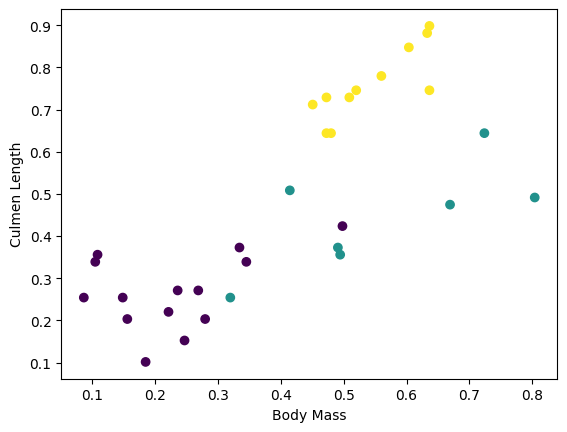

In [8]:
plt.scatter(features[:,0],
            features[:,2],
            c=labels,
            cmap='viridis')

plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()

## 간단한 선형 모델 구축하기

### 왜 모델을 사용해야하는가?

*[모델](https://developers.google.com/machine-learning/crash-course/glossary#model)*은 특성과 레이블 간의 관계입니다. 펭귄 분류 문제의 경우, 모델은 체질량과 펭귄날개 및 펭귄 부리 측정치와 예측된 펭귄 종 간의 관계를 정의합니다. 일부 간단한 모델은 몇 줄의 대수로 설명할 수 있지만, 복잡한 머신러닝 모델에는 요약하기 어려운 매개변수가 많습니다.

머신러닝을 사용하지 *않고* 4가지 특성과 펭귄 종 간의 관계를 확인할 수 있을까요? 즉, 기존 프로그래밍 기술(예: 여러 개의 조건문)을 사용하여 모델을 만들 수 있을까요? 특정 종에 대한 체질량과 펭귄 부리 측정치 간의 관계를 확인할 수 있을 만큼 충분히 오랫동안 데이터세트를 분석한 경우 가능할 수도 있습니다. 그러나 이것은 더 복잡한 데이터세트에서는 어렵거나 불가능할 수도 있습니다. 좋은 머신러닝 접근 방식이라면 적절한 모델을 제시해 줍니다. 적절한 머신러닝 모델 형식에 충분한 대표 예제를 제공하면 프로그램이 관계를 파악해 줍니다.

### 모델 선정

훈련할 모델의 종류를 선택해야 합니다. 많은 형식의 모델이 있으며 좋은 모델을 선택하려면 경험이 필요합니다. 이 튜토리얼에서는 신경망을 사용하여 펭귄 분류 문제를 해결합니다. [*신경망*](https://developers.google.com/machine-learning/glossary/#neural_network)은 특성과 레이블 간의 복잡한 관계를 찾을 수 있으며, 하나 이상의 [*숨겨진 레이어*](https://developers.google.com/machine-learning/glossary/#hidden_layer)로 구성된 고도로 구조화된 그래프입니다. 각 숨겨진 레이어는 하나 이상의 [*신경*](https://developers.google.com/machine-learning/glossary/#neuron)으로 구성됩니다. 신경망에는 여러 범주가 있으며, 이 프로그램은 조밀하거나 [*완전히 연결된 신경망*](https://developers.google.com/machine-learning/glossary/#fully_connected_layer)을 사용합니다. 즉, 한 레이어의 신경은 이전 레이어의 *모든* 신경에서 입력 연결을 받습니다. 예를 들어, 그림 2는 입력 레이어, 2개의 숨겨진 레이어 및 출력 레이어로 구성된 조밀한 신경망을 보여줍니다.

<table>
  <tr><td>     <img src="https://www.tensorflow.org/images/custom_estimators/full_network.png" alt="A diagram of the network architecture: Inputs, 2 hidden layers, and outputs">   </td></tr>
  <tr><td align="center">     <b>그림 2.</b> 특성, 숨겨진 레이어, 예측으로 구성된 신경망<br> </td></tr>
</table>

그림 2의 모델을 훈련하고 레이블이 지정되지 않은 예제를 제공하면, 이 펭귄이 주어진 펭귄 종일 가능성에 대한 3가지 예측값이 생성됩니다. 이 예측을 [*추론*](https://developers.google.com/machine-learning/crash-course/glossary#inference)이라고 합니다. 이 예제에서 출력 예측값의 합계는 1.0입니다. 그림 2에서 이 예측은 *아델리 펭귄*의 경우 `0.02`, *턱끈 펭귄*의 경우 `0.95`, *젠투 펭귄*의 경우 `0.03`입니다. 즉, 모델은 95% 확률로 레이블이 지정되지 않은 예제 펭귄이 *턱끈* 펭귄이라고 예측합니다.

### 케라스를 사용한 모델 생성

TensorFlow의 `tf.keras` API는 모델과 레이어를 생성하는 데 주로 사용됩니다. Keras가 모든 구성 요소 연결에 대한 복잡성을 처리해 주기 때문에 모델을 구축하고 실험하는 데 용이합니다.

`tf.keras.Sequential` 모델은 레이어의 선형 스택입니다. 이 생성자는 레이어 인스턴스 목록을 취하는데, 아래의 경우, 각 10개의 노드를 갖는 두 개의 `tf.keras.layers.Dense` 레이어 및 3개의 노드를 갖는 출력 레이어로 구성되어 레이블 예측을 보여주고 있습니다. 첫 번째 레이어의 `input_shape` 매개변수는 데이터세트의 특성 수에 해당하며 필수적입니다.

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

*[활성화 함수](https://developers.google.com/machine-learning/crash-course/glossary#activation_function)*는 각 레이어의 노드에서 출력 형상을 결정합니다. 이러한 비선형성이 중요한데, 활성화 함수가 없는 모델은 단일 레이어와 마찬가지이기 때문입니다. `tf.keras.activations`가 많이 있지만, 숨겨진 레이어에서는 주로 [ReLU](https://developers.google.com/machine-learning/crash-course/glossary#ReLU) 함수가 사용됩니다.

숨겨진 레이어와 신경의 이상적인 수는 문제와 데이터세트에 따라 다릅니다. 머신러닝의 여러 측면과 마찬가지로 신경망의 최상의 형태를 고르기 위해서는 지식과 실험이 모두 필요합니다. 경험상 숨겨진 레이어와 신경의 수를 늘리면 일반적으로 더 강력한 모델이 생성되며 이를 효과적으로 훈련하려면 더 많은 데이터가 필요합니다.

### 모델 사용하기

이 모델이 특성의 배치에 대해 수행하는 작업을 간단히 살펴봅시다.

In [10]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.3334279 , -0.30740464,  0.23450832],
       [-0.13121836, -0.44709408,  0.23145097],
       [-0.45887685, -0.42732874,  0.33750302],
       [-0.26535368, -0.2485224 ,  0.18240781],
       [-0.24285898, -0.2467189 ,  0.15657528]], dtype=float32)>

여기에서 각 예제는 각 클래스에 대한 [로짓](https://developers.google.com/machine-learning/crash-course/glossary#logits)을 반환합니다.

이러한 로짓을 각 클래스의 확률로 변환하려면 [softmax](https://developers.google.com/machine-learning/crash-course/glossary#softmax) 함수를 사용하세요.

In [11]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.26378357, 0.27073818, 0.4654782 ],
       [0.315825  , 0.23028381, 0.45389122],
       [0.23531905, 0.24286126, 0.5218197 ],
       [0.27919087, 0.28392977, 0.43687937],
       [0.28676888, 0.28566414, 0.42756695]], dtype=float32)>

클래스에서 `tf.math.argmax`를 사용하면 예측된 클래스 인덱스가 제공됩니다. 그러나 모델은 아직 훈련되지 않았으므로 좋은 예측을 하지 않습니다.

In [12]:
print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


## 모델 훈련하기

*[훈련하기](https://developers.google.com/machine-learning/crash-course/glossary#training)*는 모델이 점차 최적화될 때 또는 모델이 데이터세트를 학습하는 머신러닝 단계입니다. 이 단계의 목표는 훈련 데이터세트의 구조에 대해 충분히 학습하여 보이지 않는 데이터를 예측하는 것입니다. 훈련 데이터세트에 대해 너무 많이 배우면 예측이 관측한 데이터에 대해서만 작동하고 일반화할 수 없습니다. 이런 문제를 과대적합이라고 하며, 이는 문제를 해결하는 방법을 이해하는 대신 답을 암기하는 것과 같습니다.

펭귄 분류 문제는 [*감독 머신러닝*](https://developers.google.com/machine-learning/glossary/#supervised_machine_learning)의 예입니다. 모델은 레이블이 포함된 예제로 훈련됩니다. [*비감독 머신러닝*](https://developers.google.com/machine-learning/glossary/#unsupervised_machine_learning)에서는 예제에 레이블이 포함되지 않습니다. 대신 모델은 일반적으로 특성 사이에서 패턴을 찾습니다.

### 손실 함수와 경사 함수 정의하기

훈련 및 평가 단계 모두에서 모델 [*손실*](https://developers.google.com/machine-learning/crash-course/glossary#loss)을 계산해야 합니다. 이것은 모델의 예측이 원하는 레이블에서 얼마나 떨어져 있는지, 즉 모델의 성능이 얼마나 안 좋은지를 측정하는 것으로, 그 값을 최소화하거나 최적화해야 합니다.

모델의 손실은 `tf.keras.losses.categorical_crossentropy` 함수를 사용해 계산합니다. 이 함수는 모델의 클래스 확률 예측과 원하는 레이블을 입력으로 받아 예의 평균 손실을 반환합니다.

In [13]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.077925682067871


모델을 최적화하기 위해 사용되는 *[그래디언트](https://developers.google.com/machine-learning/crash-course/glossary#gradient)*를 계산하기 위해 `tf.GradientTape` 컨텍스트를 사용합니다.

In [15]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

### 옵티마이저 생성

[*옵티마이저*](https://developers.google.com/machine-learning/crash-course/glossary#optimizer)는 계산된 경사를 모델의 매개변수에 적용하여 `loss` 함수를 최소화합니다. 손실 함수를 곡면에 비유한다면(그림 3 참조) 곡면에서 가장 낮은 지점을 찾는 것과 같다고 할 수 있습니다. 경사는 가장 가파른 상승 방향을 가리키므로 반대 방향으로 이동하여 내려가야 합니다. 각 배치의 손실과 경사를 반복적으로 계산하여 훈련을 통해 모델을 조정합니다. 모델은 점차 손실을 최소화하기 위해 가중치와 바이어스의 최상의 조합을 찾습니다. 손실이 낮을수록 모델의 예측값은 더 좋아집니다.

<table>
  <tr><td>     <img src="https://cs231n.github.io/assets/nn3/opt1.gif" width="70%" alt="Optimization algorithms visualized over time in 3D space.">   </td></tr>
  <tr><td align="center"> <b>그림 3.</b> 3D 공간에서 시간에 걸쳐 시각화한 최적화 알고리즘.<br>(출처: <a href="http://cs231n.github.io/neural-networks-3/">Stanford class CS231n</a>, MIT License, 이미지 제공: <a href="https://twitter.com/alecrad">Alec Radford</a>)</td></tr>
</table>

TensorFlow에는 훈련에 사용할 수 있는 많은 최적화 알고리즘이 있습니다. 이 튜토리얼에서는 [*확률적 경사하강법*](https://developers.google.com/machine-learning/crash-course/glossary#gradient_descent)(SGD) 알고리즘을 구현하는 `tf.keras.optimizers.SGD`를 사용합니다. `learning_rate` 매개변수는 경사 아래로 반복할 때마다 수행할 단계 크기를 설정합니다. 이 비율은 더 나은 결과를 얻기 위해 일반적으로 조정하는 [*하이퍼 매개변수*](https://developers.google.com/machine-learning/glossary/#hyperparameter)입니다.

[*학습률*](https://developers.google.com/machine-learning/glossary#learning-rate)이 `0.01`인 최적화 도구를 인스턴스화합니다. 스칼라 값은 각 훈련 반복에서 기울기를 곱한 값입니다.

In [16]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

그런 다음 이 개체를 사용하여 단일 최적화 단계를 계산합니다.

In [17]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.077925682067871


Step: 1,         Loss: 1.0767297744750977


### 훈련 루프

여기까지 모두 마쳤다면 모델을 훈련할 준비가 되었습니다! 훈련 루프는 더 나은 예측을 할 수 있도록 데이터세트 예제를 모델에 제공합니다. 다음 코드 블록은 이러한 훈련 단계를 설정합니다.

1. 각 *epoch* 반복. Epoch는 데이터세트를 통과시키는 횟수입니다.
2. 하나의 Epoch 내에서 *특성*(`x`)과 *레이블*(`y`)이 포함된 훈련 `Dataset`의 각 예를 반복합니다.
3. 예의 특성을 사용하여 예측을 수행하고 레이블과 비교합니다. 예측의 부정확성을 측정하고 이를 사용하여 모델의 손실 및 그래디언트를 계산합니다.
4. `optimizer`를 사용하여 모델의 매개변수를 업데이트합니다.
5. 시각화를 위해 몇가지 값들을 저장합니다.
6. 각 epoch에 대해 반복합니다.

`num_epochs` 변수는 데이터세트 모음을 반복하는 횟수입니다. 아래 코드에서 `num_epochs`가 201로 설정되어 있기에 이 훈련 루프는 201번 실행됩니다. 단순히 생각해도 모델을 더 오래 훈련한다고 해서 더 나은 모델이 보장되지는 않습니다. `num_epochs`는 조정할 수 있는 [*하이퍼 매개변수*](https://developers.google.com/machine-learning/glossary/#hyperparameter)입니다. 적절한 횟수의 선택에는 많은 경험과 직관이 필요합니다.

In [18]:
## Note: Rerunning this cell uses the same model parameters

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.071, Accuracy: 35.581%


Epoch 050: Loss: 0.688, Accuracy: 80.524%


Epoch 100: Loss: 0.437, Accuracy: 80.899%


Epoch 150: Loss: 0.319, Accuracy: 88.764%


Epoch 200: Loss: 0.231, Accuracy: 94.757%


또는 내장된 Keras [`Model.fit(ds_train_batch)`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 사용하여 모델을 훈련할 수 있습니다. 

### 시간에 따른 손실함수 시각화

모델의 훈련 과정을 출력하는 것도 유용하지만 TensorFlow와 함께 제공되는 시각화 및 메트릭 도구인 [텐서보드](https://www.tensorflow.org/tensorboard)(TensorBoard)를 사용하여 훈련 과정을 시각화할 수 있습니다. 이 간단한 예제에서는 `matplotlib` 모듈을 사용하여 기본 차트를 만듭니다.

이러한 차트를 해석하려면 어느 정도의 경험이 필요하지만, 일반적으로 *손실*은 감소하고 *정확성*이 증가하는 것을 확인하고자 합니다.

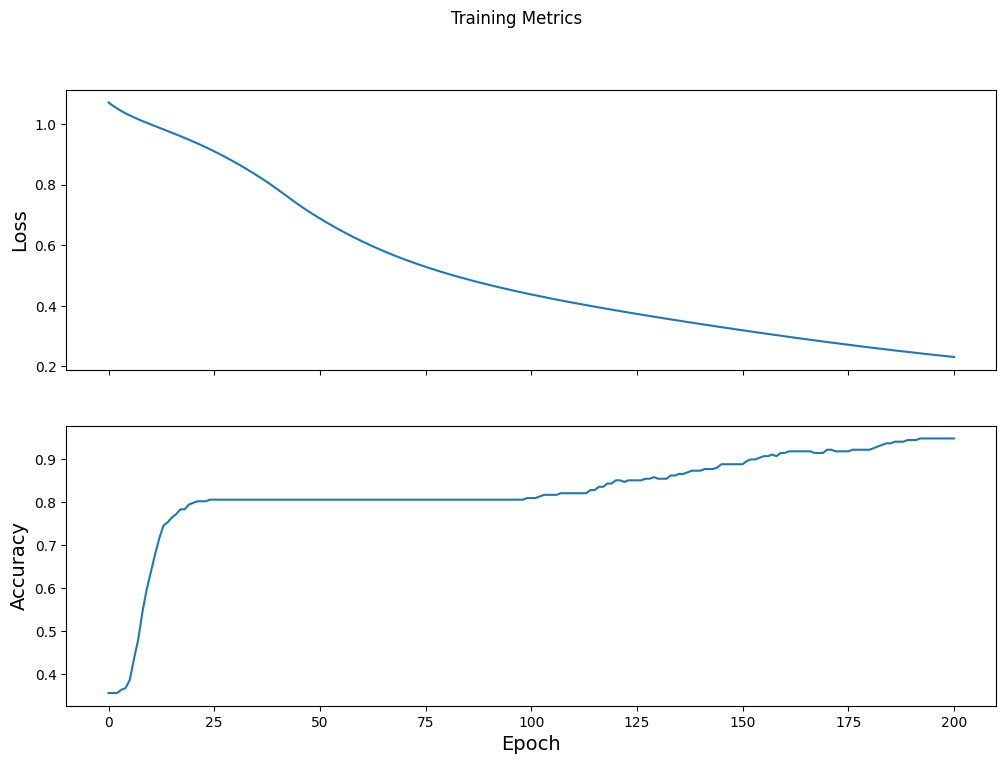

In [19]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## 모델 유효성 평가

이제 모델이 훈련되었으므로 성능에 대한 통계를 얻을 수 있습니다.

*평가*는 모델이 얼마나 효과적으로 예측을 수행하는지 알아보는 것을 의미합니다. 펭귄 분류에서 모델의 효과를 확인하려면 측정 정보를 모델에 전달하고 해당 모델이 펭귄 종을 예측하도록 요청합니다. 그런 다음 모델의 예측을 실제 레이블과 비교합니다. 예를 들어, 입력 예제의 절반에서 올바른 종을 선택한 모델의 [*정확성*](https://developers.google.com/machine-learning/glossary/#accuracy)은 `0.5`입니다. 그림 4는 약간 더 효과적인 모델을 보여줍니다. 5개 예측 중 4개는 80% 정확성으로 정확합니다.

<table cellpadding="8" border="0">
  <colgroup>
    <col span="4">
    <col span="1" bgcolor="lightblue">
    <col span="1" bgcolor="lightgreen">
  </colgroup>
  <tr bgcolor="lightgray">
    <th colspan="4">샘플 특성</th>
    <th colspan="1">레이블</th>
    <th colspan="1">모델 예측</th>
  </tr>
  <tr>
    <td>5.9</td>
<td>3.0</td>
<td>4.3</td>
<td>1.5</td>
<td align="center">1</td>
<td align="center">1</td>
  </tr>
  <tr>
    <td>6.9</td>
<td>3.1</td>
<td>5.4</td>
<td>2.1</td>
<td align="center">2</td>
<td align="center">2</td>
  </tr>
  <tr>
    <td>5.1</td>
<td>3.3</td>
<td>1.7</td>
<td>0.5</td>
<td align="center">0</td>
<td align="center">0</td>
  </tr>
  <tr>
    <td>6.0</td> <td>3.4</td> <td>4.5</td> <td>1.6</td> <td align="center">1</td>
<td align="center" bgcolor="red">2</td>
  </tr>
  <tr>
    <td>5.5</td>
<td>2.5</td>
<td>4.0</td>
<td>1.3</td>
<td align="center">1</td>
<td align="center">1</td>
  </tr>
  <tr><td align="center" colspan="6">     <b>그림 4.</b> 정확성 80%의 펭귄 분류기<br> </td></tr>
</table>

### 테스트 세트 설정하기

모델 평가는 모델 훈련과 유사합니다. 가장 큰 차이점은 예제가 훈련 세트가 아닌 별도의 *[테스트 세트](https://developers.google.com/machine-learning/crash-course/glossary#test_set)*에서 나온다는 것입니다. 모델의 효과를 공정하게 평가하려면 모델을 평가하는 데 사용되는 예가 모델 훈련에 사용된 예와 달라야 합니다.

펭귄 데이터세트에는 별도의 테스트 데이터세트가 없으므로 이전 데이터세트 다운로드 섹션에서 원본 데이터세트를 테스트 및 훈련 데이터세트로 분할했습니다. 평가를 위해 `ds_test_batch` 데이터세트를 사용합니다.

### 테스트 데이터 세트를 사용한 모델 평가

훈련 단계와 달리 모델은 테스트 데이터의 단일 [epoch](https://developers.google.com/machine-learning/glossary/#epoch)만 평가합니다. 다음 코드는 테스트 세트의 각 예제를 반복하고 모델의 예측값을 실제 레이블과 비교합니다. 이 비교는 전체 테스트세트에서 모델의 정확성을 측정하는 데 사용됩니다.

In [20]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 94.030%


`model.evaluate(ds_test, return_dict=True)` keras 함수를 사용하여 테스트 데이터세트의 정확성 정보를 가져올 수도 있습니다. 

예를 들어 마지막 배치를 검사하여 모델 예측이 일반적인 상황에서 정확한지 관찰할 수 있습니다.


In [21]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 0],
       [2, 2],
       [0, 0]])>

## 훈련된 모델로 예측하기

모델을 훈련하고 이 모델이 펭귄 종을 분류하는 데 훌륭함을 "증명"했지만 완벽하지는 않습니다. 이제 훈련된 모델을 사용하여 [*레이블이 없는 예제*](https://developers.google.com/machine-learning/glossary/#unlabeled_example)에 대한 예측을 수행해 보겠습니다. 즉, 특성은 포함하지만 레이블은 포함하지 않는 예제입니다.

실제로 레이블이 없는 예제는 앱, CSV 파일, 데이터 피드 등 다양한 소스로부터 제공될 수 있습니다. 이 튜토리얼에서는 레이블을 예측하기 위해 레이블이 없는 3가지 예를 수동으로 제공합니다. 레이블 번호는 다음과 같이 표시됩니다.

- `0`: 아델리 펭귄
- `1`: 턱끈 펭귄
- `2`: 젠투 펭귄

In [22]:
predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adélie (78.5%)
Example 1 prediction: Gentoo (98.3%)
Example 2 prediction: Chinstrap (76.2%)
